#**Práctica 3 (Reducción de la dimensionalidad)**

**Existen casos en que las variables no se pueden representar visualmente debido a que necesitaríamos varia dimensiones para ello. Para evitar esto, existe una metodología en la cual, un set de datos multidimensional,podemos transformarlo para poder explicar gran parte de la información en 2 o 3 dimensiones. Dicha metodología se conoce con el nombre de Principal Component Analysis (PCA). Vamos a aplicarlo a un set de
datos que está colgado en Canvas llamado USA.xlsx y vamos a dar una serie de explicaciones de que ocurre.**

**1.- Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de
la librería scikit-learn.**

Para ello ajustaremos la escala de las características para tener una media cero y una desviación estándar de uno. Posteriormente, planeamos guardar los datos estandarizados en un nuevo archivo llamado 'USA_estandarizado.xlsx'. Este paso es esencial para facilitar análisis más avanzados y construir modelos predictivos precisos en etapas posteriores del proyecto.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


# Importar el archivo exel
archivo_excel = 'USA.xlsx'

# Lee el archivo .xlsx
datos_excel = pd.read_excel(archivo_excel)

# Ahora, los datos están almacenados en un DataFrame llamado datos_excel
# Puedes imprimir el DataFrame para verificar que los datos se han leído correctamente
print(datos_excel)

                 Ciudad    SO2  Neg.Temp  Empresas  Poblacion  Viento  Precip  \
0               Phoenix   10.0      70.3     213.0      582.0     6.0    7.05   
1           Little Rock   13.0      61.0      91.0      132.0     8.2   48.52   
2         San Francisco   12.0      56.7     453.0      716.0     8.7   20.66   
3                Denver   17.0      51.9     454.0      515.0     9.0   12.95   
4              Hartford   56.0      49.1     412.0      158.0     9.0   43.37   
5            Wilmington   36.0      54.0      80.0       80.0     9.0   40.25   
6            Washington   29.0      57.3     434.0      757.0     9.3   38.89   
7          Jacksonville   14.0      68.4     136.0      529.0     8.8   54.47   
8                 Miami   10.0      75.5     207.0      335.0     9.0   59.80   
9               Atlanta   24.0      61.5     368.0      497.0     9.1   48.34   
10              Chicago  110.0      50.6    3344.0     3369.0    10.4   34.44   
11         Indianapolis   28

In [ ]:
!pip install scikit-learn

In [ ]:

# Seleccionar solo las columnas numéricas para la estandarización
datos_numericos = datos_excel.select_dtypes(include=['int64', 'float64'])

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a los datos numéricos
datos_estandarizados = scaler.fit_transform(datos_numericos)

# Crear un nuevo DataFrame con los datos estandarizados
datos_estandarizados_df = pd.DataFrame(datos_estandarizados, columns=datos_numericos.columns)

# Combinar los datos estandarizados con las columnas no numéricas
for columna in datos_excel.columns:
    if columna not in datos_numericos.columns:
        datos_estandarizados_df[columna] = datos_excel[columna]

# Guardar los datos estandarizados en un nuevo archivo Excel
archivo_estandarizado = 'USA_estandarizado.xlsx'
datos_estandarizados_df.to_excel(archivo_estandarizado, index=False)

print("Los datos se han estandarizado y guardado en el archivo:", archivo_estandarizado)

Los datos se han estandarizado y guardado en el archivo: USA_estandarizado.xlsx


Estamos estandarizando los datos numéricos del conjunto de datos. Esto implica transformarlos para tener una media de cero y una desviación estándar de uno, facilitando la comparación y el análisis. Para hacerlo, seleccionamos las columnas numéricas y las transformamos usando StandardScaler. Luego, combinamos los datos estandarizados con las columnas no numéricas del conjunto original. Finalmente, guardamos este nuevo conjunto de datos en un archivo Excel para su posterior análisis.









 **2.- El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y
los autovectores (eigenvectors) que nos permitan explicar cuántos componentes necesitamos para
representar los datos iniciales. Para ello, en primer lugar, habrá que obtener la matriz de covarianza
mediante el método cov de Numpy y después aplicarle a dicha matriz el método linalg.eig también de
NumPy. Obtén un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica
qué quieren decir estos datos. ¿Cuánta información perdemos con 2 componentes? ¿Cuánta información
representamos con 3 componentes?**


En esta parte del ejercicio, aplicaremos el análisis de componentes principales (PCA) a nuestros datos estandarizados. Con PCA, reduciremos la dimensionalidad de los datos y encontraremos las características más importantes que explican su variabilidad. Ajustaremos un objeto PCA a los datos estandarizados para obtener las componentes principales, autovalores y autovectores. Luego, compararemos estos resultados con los obtenidos a partir de la matriz de covarianza de los datos estandarizados. Además, examinaremos los autovalores y autovectores para comprender la importancia de cada componente en la variabilidad de los datos.

In [ ]:
# Aplicar PCA
pca = PCA(0.8)
pca.fit(datos_estandarizados)

# Obtener autovalores y autovectores
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Mostrar los autovalores y autovectores
print("Autovalores (Eigenvalues):")
print(eigenvalues)
print("\nAutovectores (Eigenvectors):")
print(eigenvectors)

Autovalores (Eigenvalues):
[2.79632268 1.55014323 1.42984731]

Autovectores (Eigenvectors):
[[ 4.89698817e-01 -3.15370690e-01  5.41168703e-01  4.87588112e-01
   2.49874928e-01  1.87312186e-04  2.60179073e-01]
 [-8.45756306e-02  8.86378850e-02  2.25881089e-01  2.82003804e-01
  -5.54714865e-02 -6.25879366e-01 -6.77967410e-01]
 [ 1.43501956e-02  6.77136178e-01  2.67159129e-01  3.44837959e-01
  -3.11265456e-01  4.92036299e-01 -1.09578949e-01]]


Se pueden sacar los autovalores y autovectores usando la librería scikit-learn, aun así, sacaremos las componentes principales a lo largo del siguiente código, donde no usaremos las facilidades de esta librería.

In [ ]:
cov_matrix = np.cov(datos_estandarizados, rowvar=False)

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(cov_matrix)

# Ordenar los autovalores de mayor a menor y sus autovectores correspondientes
indices_ord = np.argsort(autovalores)[::-1]
autovalores_ord = autovalores[indices_ord]
autovectores_ord = autovectores[:, indices_ord]

# Calcular el porcentaje de varianza explicada
var_exp = autovalores_ord / np.sum(autovalores_ord)
var_exp_acum = np.cumsum(var_exp)

# Imprimir var_exp y var_exp_acum en columnas
print("Porcentaje de Varianza Explicada  |  Varianza Explicada Acumulada")
print("-" * 60)  # Línea divisoria para mejorar la legibilidad

for v_exp, v_exp_acum in zip(var_exp, var_exp_acum):
    print(f"{v_exp:.4f}                              | {v_exp_acum:.4f}")

# Encontrar el número de componentes principales para alcanzar el umbral del 80%
# que ha sido definido por nosotros.
num_components = np.argmax(var_exp_acum >= 0.8) + 1

# Seleccionar los componentes principales
principal_components = datos_estandarizados.dot(autovectores_ord[:, :num_components])

# Crear una tabla que relacione las componentes principales con las variables iniciales
components_df = pd.DataFrame(autovectores_ord[:, :num_components], columns=['Componente Principal ' + str(i + 1) for i in range(num_components)], index=datos_numericos.columns)
print("Tabla de relación entre componentes principales y variables iniciales:")
print(components_df)


Porcentaje de Varianza Explicada  |  Varianza Explicada Acumulada
------------------------------------------------------------
0.3897                              | 0.3897
0.2160                              | 0.6058
0.1993                              | 0.8051
0.1274                              | 0.9325
0.0495                              | 0.9820
0.0143                              | 0.9964
0.0036                              | 1.0000
Tabla de relación entre componentes principales y variables iniciales:
           Componente Principal 1  Componente Principal 2  \
SO2                      0.489699                0.084576   
Neg.Temp                -0.315371               -0.088638   
Empresas                 0.541169               -0.225881   
Poblacion                0.487588               -0.282004   
Viento                   0.249875                0.055471   
Precip                   0.000187                0.625879   
Dias                     0.260179                0.677967   

En la tabla presentada, se muestran los **porcentajes de varianza explicada** por cada componente principal, así como la **varianza explicada acumulada**. Se observa que la primera componente explica el 38.97% de la varianza total, mientras que la segunda componente explica el 21.60%, y así sucesivamente, hasta que la séptima componente explica el 0.0036%, sumando un total del 100% de la varianza explicada.

Con 2 componentes, perdemos aproximadamente el 39.42% de la información original. 100%-60.58%=39.42%.

Con 3 componentes, representamos aproximadamente el 80.51% de la información original.

Además, se proporciona una tabla que muestra la relación entre las componentes principales y las variables originales.
Por ejemplo, la primera componente principal está más fuertemente asociada con la concentración de SO2 y el número de empresas, mientras que la segunda componente principal está relacionada principalmente con la temperatura negativa y la precipitación, y la tercera componente principal está asociada con la temperatura negativa y la población.

In [ ]:
print("Matriz de covarianza:")
print(cov_matrix)

Matriz de covarianza:
[[ 1.025      -0.4444402   0.66088794  0.50612407  0.09705772  0.0556517
   0.37880272]
 [-0.4444402   1.025      -0.19479322 -0.06424509 -0.35848312  0.39590975
  -0.44099817]
 [ 0.66088794 -0.19479322  1.025       0.97915108  0.24389551 -0.0332273
   0.13512503]
 [ 0.50612407 -0.06424509  0.97915108  1.025       0.21795984 -0.0267717
   0.04313527]
 [ 0.09705772 -0.35848312  0.24389551  0.21795984  1.025      -0.01331924
   0.16820823]
 [ 0.0556517   0.39590975 -0.0332273  -0.0267717  -0.01331924  1.025
   0.50849912]
 [ 0.37880272 -0.44099817  0.13512503  0.04313527  0.16820823  0.50849912
   1.025     ]]


La matriz de covarianza proporciona información sobre las relaciones lineales entre pares de variables en un conjunto de datos. En este caso, al analizar la matriz de covarianza, observo que la diagonal principal contiene las varianzas de cada variable. Por ejemplo, la varianza de **SO2** es 1.025, la varianza de **Temperatura Negativa** es 1.025, y así sucesivamente para todas las variables. Además, los elementos fuera de la diagonal principal representan las covarianzas entre pares de variables.

 Por ejemplo, el valor -0.4444402 indica la covarianza entre **SO2** y **Temperatura Negativa**. Un valor negativo indica una relación inversa entre las variables, mientras que un valor positivo indica una relación directa. Por lo tanto, al interpretar esta matriz de covarianza, puedo inferir cómo las diferentes variables están relacionadas entre sí en términos de su variabilidad conjunta.

**3.- Por último queremos representar gráficamente las ciudades de nuestro dataset, pero usando los valores de las componentes principales obtenidas. Obtén un diagrama de dispersión en 3 dimensiones y comenta qué has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria.Habrá que interpretar qué información proporciona el eje X, Y y el Z. Por último, elegir al menos 4 ciudades de forma aleatoria y explicar qué pasa con ellas.**



Planteamos obtener un diagrama de dispersión tridimensional utilizando las componentes principales obtenidas mediante PCA para representar las ciudades del dataset. Cada eje (X, Y, Z) representará una de las tres componentes principales. Interpretaremos la información proporcionada por cada eje en relación con las características originales de los datos. Se seleccionarán al menos cuatro ciudades aleatorias para explicar cómo se distribuyen en el espacio tridimensional definido por las componentes principales.

In [ ]:
print(components_df)

           Componente Principal 1  Componente Principal 2  \
SO2                      0.489699                0.084576   
Neg.Temp                -0.315371               -0.088638   
Empresas                 0.541169               -0.225881   
Poblacion                0.487588               -0.282004   
Viento                   0.249875                0.055471   
Precip                   0.000187                0.625879   
Dias                     0.260179                0.677967   

           Componente Principal 3  
SO2                     -0.014350  
Neg.Temp                -0.677136  
Empresas                -0.267159  
Poblacion               -0.344838  
Viento                   0.311265  
Precip                  -0.492036  
Dias                     0.109579  


**Componente 1** parece estar influenciada principalmente por las concentraciones de SO2, Empresas y Población, ya que tienen los mayores valores absolutos en esa componente. Esto sugiere que estos tres factores tienen una influencia significativa en la dirección de la primera componente principal.

**Componente 2** está dominada negativamente por la Temperatura Negativa y las Empresas, lo que indica que estas dos variables tienen una influencia negativa en la dirección de la segunda componente principal. Además, la Precipitación tiene un impacto significativo en esta componente, pero en una dirección positiva.

**Componente 3** muestra una relación inversa con la Temperatura Negativa, las Empresas y la Población, lo que sugiere que estas variables tienen una influencia negativa en la dirección de la tercera componente principal. Por otro lado, la Precipitación tiene una influencia positiva en esta componente.

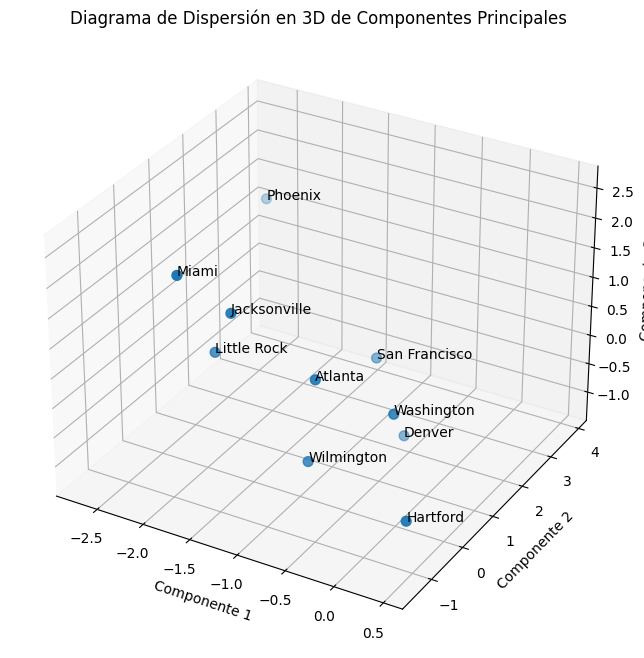

In [ ]:
ciudades = datos_excel.iloc[:10, 0]

# Crear el gráfico tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Agregar los puntos al gráfico 3D
ax.scatter(componentes_principales[:10, 0], componentes_principales[:10, 1], componentes_principales[:10, 2], s=50)

# Agregar los nombres de las ciudades a cada punto
for i, ciudad in enumerate(ciudades):
    ax.text(componentes_principales[i, 0], componentes_principales[i, 1], componentes_principales[i, 2], ciudad)
# Etiquetas de los ejes
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Título del gráfico
plt.title('Diagrama de Dispersión en 3D de Componentes Principales')

# Mostrar el gráfico
plt.show()

Para nuestro diagrama solo hemos cogido las 10 primeras ciudades, ya que si cogiamos todas, el resultado iba a ser un mogollon imposible de interpretar.


Basándonos en las altas cargas en las componentes principales 3 y 2, y la baja carga en la componente principal 1 para la ciudad de **Phoenix**, podemos inferir que la ciudad probablemente experimenta temperaturas más cálidas en comparación con otras, con un número significativo de empresas, pero con una menor influencia de variables como SO2, Empresas y Población en su variabilidad. Esto nos sugiere un entorno urbano con una población relativamente pequeña y menos preocupaciones sobre la contaminación del aire, mientras que las condiciones climáticas pueden ser más moderadas y favorables para el desarrollo empresarial.

Parece ser, por lo que podemos apreciar, **San Francisco** tiene un número significativo de empresas y experimenta temperaturas más bajas en comparación con otras ciudades, lo que sugiere un entorno urbano con una actividad empresarial activa y condiciones climáticas más frescas. Además, la baja carga en la componente 3 indica una menor influencia de variables como la Temperatura Negativa, las Empresas y la Población, lo que puede indicar una menor preocupación por la temperatura y la densidad poblacional en comparación con otras ciudades. Esta ciudad parece tener un entorno urbano con un buen equilibrio entre la actividad empresarial y las condiciones climáticas, con una menor influencia de factores como la contaminación del aire y la densidad poblacional.






Es probable que **Little Rock** tenga una actividad empresarial significativa y experimente temperaturas más bajas en comparación con otras ciudades, lo que sugiere un entorno urbano con una actividad empresarial activa y condiciones climáticas más frescas. Sin embargo, la baja carga en la componente 1 y 3 indica una menor influencia de variables como SO2, Empresas y Población, así como una menor preocupación por la contaminación del aire y la densidad poblacional en comparación con otras ciudades. Esta ciudad parece tener un entorno urbano con una actividad empresarial activa y condiciones climáticas moderadas, pero con menos impacto de factores como la contaminación del aire y la densidad poblacional en su variabilidad.